In [1]:
import pickle
import numpy
import matplotlib.pylab as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
from datetime import datetime

In [2]:
import pandas as pd

In [3]:
with open('rt_matrix_contrast_0612_1014_21_44.pkl', 'rb') as f:
    data = pickle.load(f)
    

In [4]:
def get_decision_time(pop_rate, threshold=25):
    rate_A = pop_rate['pop_rate_a']
    rate_B = pop_rate['pop_rate_b']
    
    above_thre_A = (pop_rate['pop_rate_a'] > threshold)
    idx_over_threshold_A = numpy.where(above_thre_A==True)


    above_thre_B = (pop_rate['pop_rate_b'] > threshold)
    idx_over_threshold_B = numpy.where(above_thre_B==True)

    # monitor each firing rate at every moment 
    decision_time_A = 0

    decision_time_B = 0

    for i in range(len(above_thre_A)):

        # find the time when the divergen starts happening

        above_thre_A = (rate_A > threshold)
        idx_over_threshold_A = numpy.where(above_thre_A==True)


        above_thre_B = (rate_B > threshold)
        idx_over_threshold_B = numpy.where(above_thre_B==True)



    if len(idx_over_threshold_A[0]) > 0:
        decision_time_A = idx_over_threshold_A[0][0];
        
    else: 
        pass

    if len(idx_over_threshold_B[0]) > 0:
        decision_time_B = idx_over_threshold_B[0][0];

    else: 
        pass
    

    #print(decision_time_A, decision_time_B)
    return decision_time_A, decision_time_B

In [5]:
def plot_rate(pop_rate):
    rate_a = pop_rate['pop_rate_a']
    rate_b = pop_rate['pop_rate_b']
    time = pop_rate['time']
    plt.rcParams['font.size'] = 18
    
    
    plt.plot(time, rate_a,  linewidth= 2.5)
    plt.plot(time, rate_b, linewidth= 2.5)
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.legend(['Population A', 'Population B'])
    plt.show()

In [6]:
def get_rt_session(data):

    def get_decision_time(pop_rate, threshold=25):
        rate_A = pop_rate['pop_rate_a']
        rate_B = pop_rate['pop_rate_b']
        
        above_thre_A = (pop_rate['pop_rate_a'] > threshold)
        idx_over_threshold_A = numpy.where(above_thre_A==True)


        above_thre_B = (pop_rate['pop_rate_b'] > threshold)
        idx_over_threshold_B = numpy.where(above_thre_B==True)

        # monitor each firing rate at every moment 
        decision_time_A = 0

        decision_time_B = 0

        for i in range(len(above_thre_A)):

            # find the time when the divergen starts happening

            above_thre_A = (rate_A > threshold)
            idx_over_threshold_A = numpy.where(above_thre_A==True)


            above_thre_B = (rate_B > threshold)
            idx_over_threshold_B = numpy.where(above_thre_B==True)



        if len(idx_over_threshold_A[0]) > 0:
            decision_time_A = idx_over_threshold_A[0][0];
            
        else: 
            pass

        if len(idx_over_threshold_B[0]) > 0:
            decision_time_B = idx_over_threshold_B[0][0];

        else: 
            pass
    

        #print(decision_time_A, decision_time_B)
        return decision_time_A, decision_time_B


    decision_times = []
    rt = []

    for i in range(len(data)):
        
        decision_time = get_decision_time(data[i])
        
        decision_times.append(decision_time)
        rt.append(max(decision_time))

    rt = [x for x in rt if x != 0]

    #rt.remove(0)
    #print(rt)

    if len(rt) == 0:
        mean_rt_in_realtime = 0

    else:

        rt_in_realtime = numpy.array(rt) - 1000
        rt_in_realtime = rt_in_realtime/10
        mean_rt_in_realtime = rt_in_realtime.mean()



    return mean_rt_in_realtime

In [7]:
keys_list = list(data.keys())



In [8]:
data_in_use = data[keys_list[3]]



In [9]:
decision_times = []
rt = []

for i in range(len(data_in_use)):
    
    decision_time = get_decision_time(data_in_use[i])
    
    decision_times.append(decision_time)
    rt.append(max(decision_time))
      

In [10]:
keysList = list(data.keys())



In [11]:
rt_times_8_by_8 = {}



In [12]:
for i in range(len(keysList)):
    
    rt_times_8_by_8[keysList[i]] =  get_rt_session(data[keysList[i]])

In [13]:
with open('20221110_rt_times_8_by_8_cohere_0612.pickle', 'wb') as handle:
    pickle.dump(rt_times_8_by_8, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    
    
    
    

In [14]:
s = pd.Series(rt_times_8_by_8, index=pd.MultiIndex.from_tuples(rt_times_8_by_8))



In [15]:
df = s.unstack()



In [16]:
import seaborn as sns



<AxesSubplot: >

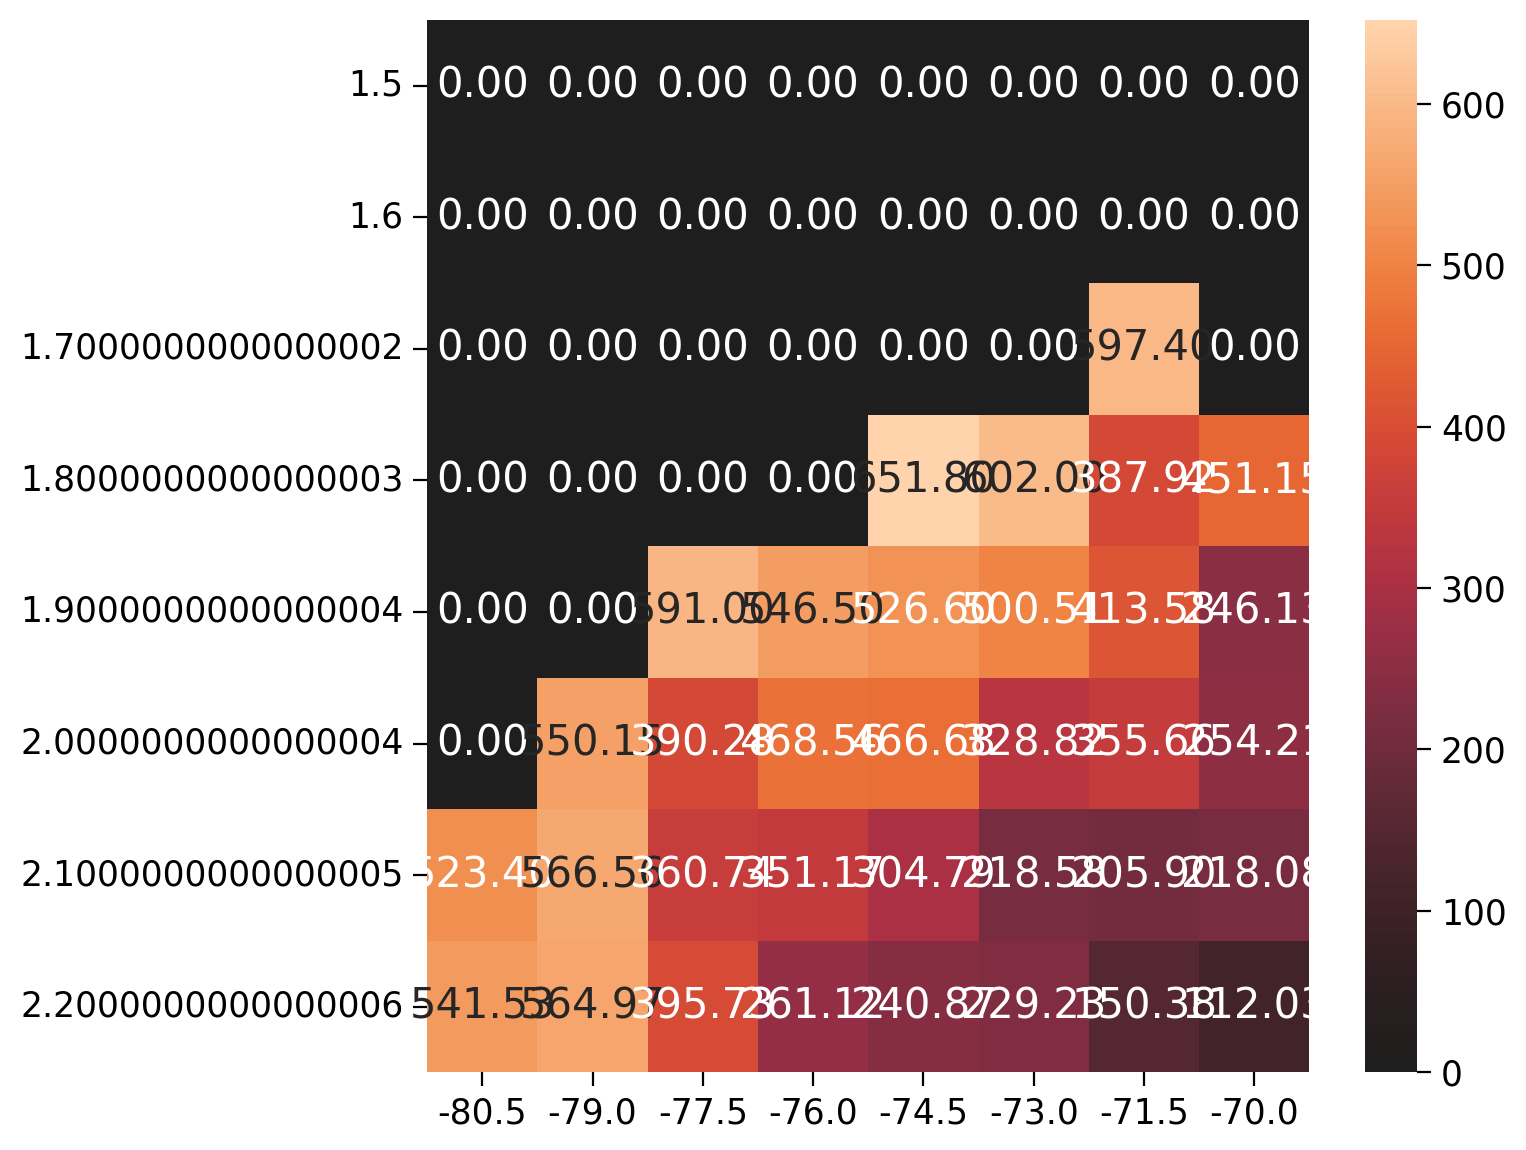

In [17]:
sns.heatmap(df, annot=True, fmt='.2f', center=0)



In [18]:
ytick_values = numpy.arange(1.5,2.2, 0.1)



In [19]:
ytick_2 = numpy.round(ytick_values,2)



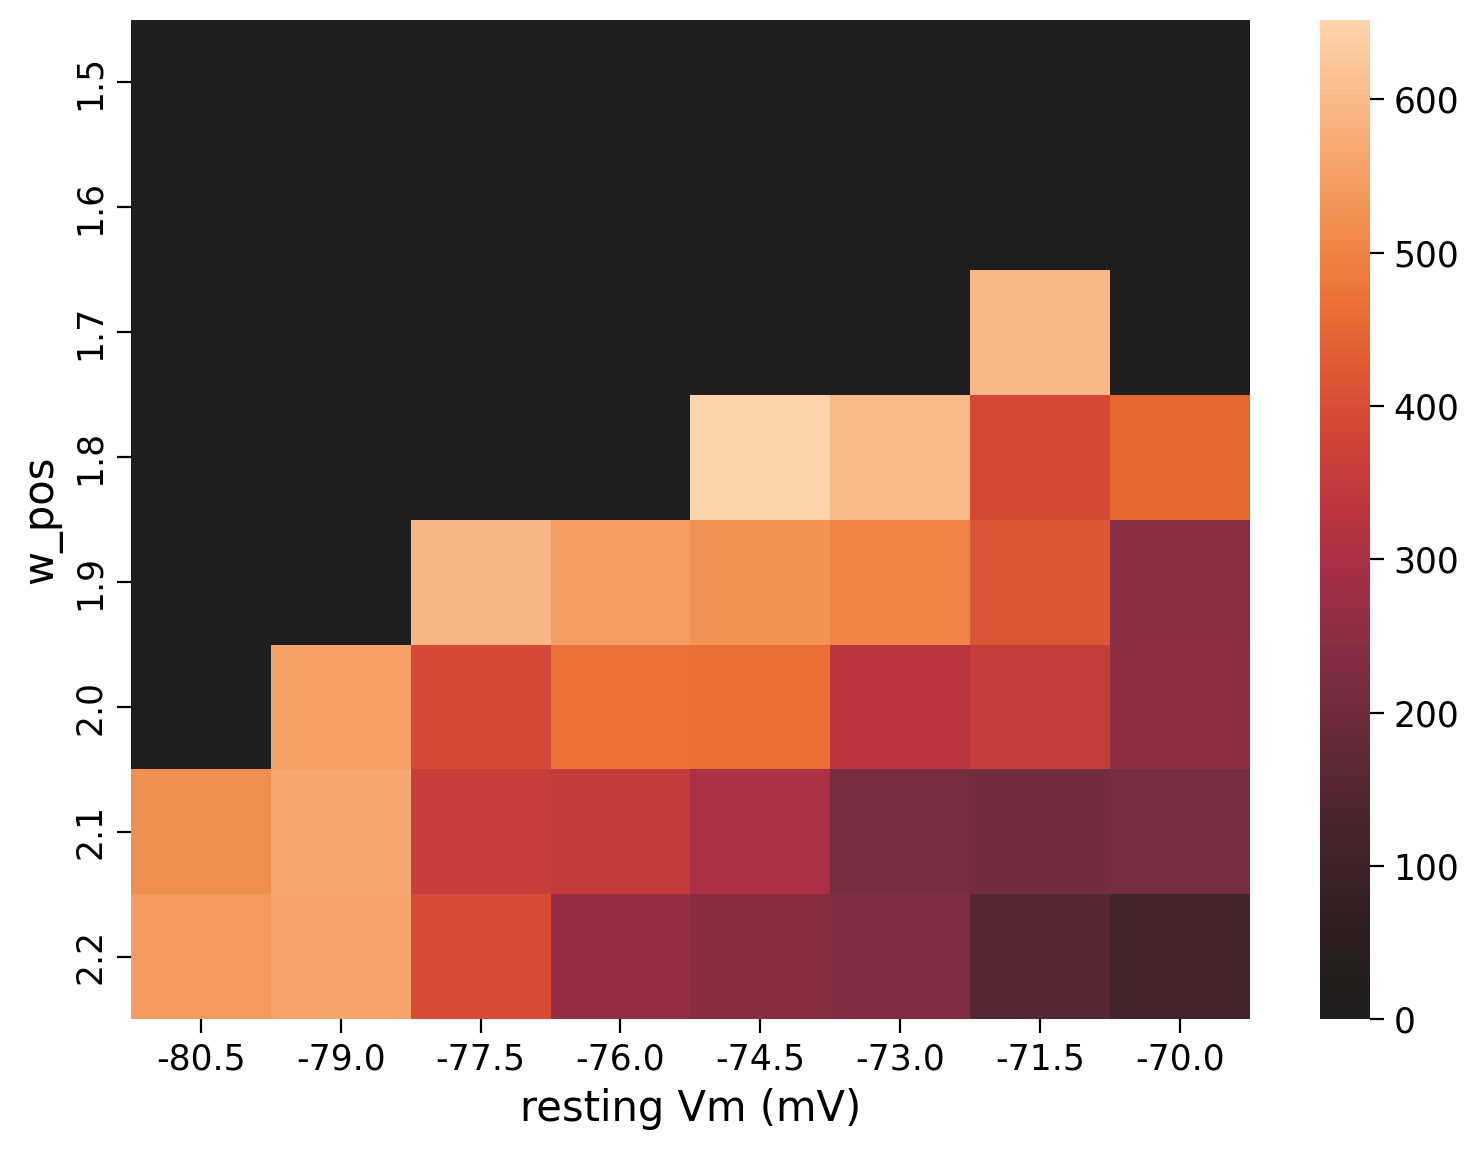

In [20]:
ax = sns.heatmap(df, annot=False,  yticklabels=ytick_2, fmt='.2f', center=0)

#ax.set_yticks(ytick)

ax.set(ylabel='w_pos', xlabel='resting Vm (mV)')



plt.show()